# Convolutional Network for Numbers Recognition

Convolutional layers don’t flatten x and y spatial dimensions, 
and need an extra dimension for colour channels (in the input image)
or multiple feature maps

In [26]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt 

# Prepare the data

In [21]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255  # (60000, 28, 28)
x_test = x_test.astype("float32") / 255 # (10000, 28, 28)

# Make sure images have shape (28, 28, 1)
# Need an extra dimension for colour channels
x_train = np.expand_dims(x_train, -1) # (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, -1) # (10000, 28, 28, 1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
y_train shape: (60000, 10)
y_test shape: (10000, 10)


# Build the model

In [23]:

# model = keras.Sequential() 
# model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=input_shape)) 
# model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu")) 
# model.add(keras.layers.MaxPool2D(pool_size=(2, 2))) 
# model.add(keras.layers.Flatten()) 
# model.add(keras.layers.Dense(128, activation="relu")) 
# model.add(keras.layers.Dense(10, activation="softmax")) 


model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # 32 filters
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # 64 filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
______________________________________________

# Train the model

In [28]:
batch_size = 128
epochs = 6

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(), 
              metrics='accuracy')

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/6
375/375 [==============================] - 44s 115ms/step - loss: 1.0797 - accuracy: 0.7666 - val_loss: 0.9544 - val_accuracy: 0.8119
Epoch 2/6
375/375 [==============================] - 45s 119ms/step - loss: 0.9618 - accuracy: 0.7954 - val_loss: 0.8466 - val_accuracy: 0.8315
Epoch 3/6
375/375 [==============================] - 49s 131ms/step - loss: 0.8641 - accuracy: 0.8104 - val_loss: 0.7551 - val_accuracy: 0.8428
Epoch 4/6
375/375 [==============================] - 45s 121ms/step - loss: 0.7740 - accuracy: 0.8247 - val_loss: 0.6789 - val_accuracy: 0.8532
Epoch 5/6
375/375 [==============================] - 45s 119ms/step - loss: 0.7109 - accuracy: 0.8328 - val_loss: 0.6172 - val_accuracy: 0.8600
Epoch 6/6
375/375 [==============================] - 44s 117ms/step - loss: 0.6462 - accuracy: 0.8441 - val_loss: 0.5672 - val_accuracy: 0.8652


# Plot the training history 

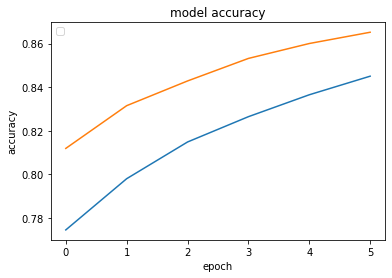

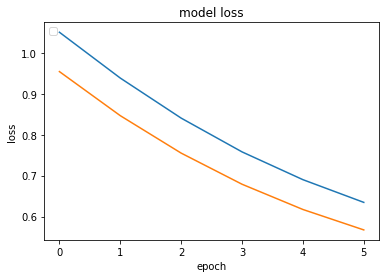

In [29]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# Evaluate the trained model

In [30]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

Test loss: 0.5780344605445862
Test accuracy: 0.8622999787330627


# REDO: Add dropout layers 

In [32]:
model2 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"), # 32 filters
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"), # 64 filters
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(rate=0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(rate=0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model2.summary()



batch_size = 128
epochs = 6

model2.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(), 
              metrics='accuracy')

history2 = model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

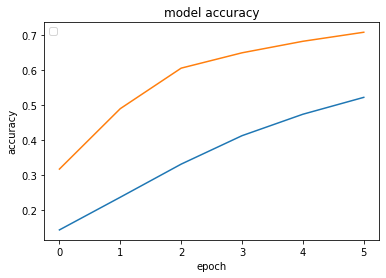

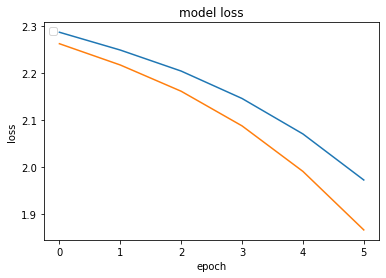

In [33]:
# summarize history for accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.show()

# summarize history for loss


plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.show()

# Evaluate the two trained model

In [34]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Model 1")
print("Test loss:", loss)
print("Test accuracy:", accuracy)
print("")

loss2, accuracy2 = model2.evaluate(x_test, y_test, verbose=0)
print("Model 2")
print("Test loss:", loss2)
print("Test accuracy:", accuracy2)

Model 1
Test loss: 0.5780344605445862
Test accuracy: 0.8622999787330627

Model 2
Test loss: 1.8672006130218506
Test accuracy: 0.7081999778747559
